hello


#Setting Up Necessary Things

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 32 # batch size
version = 5

In [ ]:
import os
print(os.getcwd())  # Check the current working directory
print(os.listdir())  # List available files and folders


/content
['.config', 'sample_data']


In [ ]:
!pip install -Uqq fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.1 MB/s eta 0:00:00


In [ ]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/project/Data

/content/drive/MyDrive/project/Data


# Fetch Data

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))

In [ ]:
data_path = "/content/drive/MyDrive/project/Data"  # Define the dataset path

In [ ]:
import os

# Ensure the "dataloaders" directory exists
os.makedirs("dataloaders", exist_ok=True)

# Now save the dataloaders object
#torch.save(dls, f"dataloaders/Celebrity_dataloader_v0{version}.pkl")


In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path, bs = bs)
# Now save the dataloaders object
torch.save(dls, f"dataloaders/Celebrity_dataloader_v0{version}.pkl")


In [ ]:

print(os.path.exists(f"dataloaders/Celebrity_dataloader_v0{version}.pkl"))


True


In [ ]:
#dls.show_batch(max_n=9, figsize=(8,6))


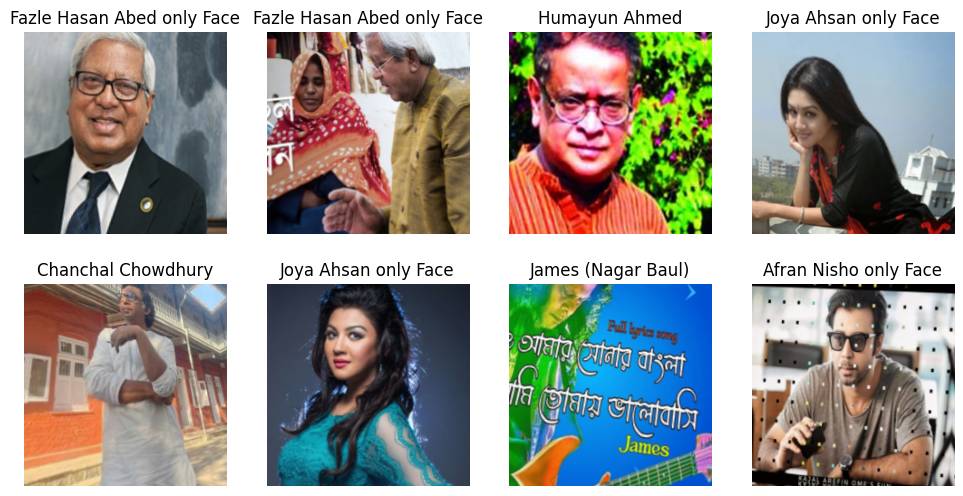

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
#dls.valid.show_batch(max_n=8, nrows=2)

In [ ]:
dls.train.vocab

['Afran Nisho only Face', 'Afsana Mimi', 'Arfin Shuvoo onlyFace', 'Ayub Bachchu only Face', 'Chanchal Chowdhury', 'Dr. Muhammad Yunus', 'Fazle Hasan Abed only Face', 'Humayun Ahmed', 'James (Nagar Baul)', 'Joya Ahsan only Face', 'Mashrafe Bin Mortaza', 'Mizanur Rahman Azhari only Face', 'Mostofa Sarwar Farooki', 'Sabina Khatun', 'Sabina Yasmin only Face', 'Shakib Al Hasan', 'Shakib Khan', 'Tahsan Khan', 'Tamim Iqbal']

# Training and Data Cleaning

In [ ]:
model_path="models"

In [ ]:
model=vision_learner(dls,resnet34,metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 175MB/s]


In [ ]:
model.fine_tune(30)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,3.085820,1.459599,0.447236,0.552764,12:17


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.638997,1.104723,0.336683,0.663317,00:31
1,1.376691,0.972577,0.306533,0.693467,00:29
2,1.103692,0.785313,0.271357,0.728643,00:29
3,0.893951,0.756470,0.231156,0.768844,00:29
4,0.695603,0.716996,0.221106,0.778894,00:29
5,0.577828,0.729987,0.190955,0.809045,00:31
6,0.496290,0.746594,0.195980,0.804020,00:29
7,0.404797,0.695617,0.185930,0.814070,00:29
8,0.384631,0.752748,0.201005,0.798995,00:29
9,0.346560,0.738294,0.185930,0.814070,00:30


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in by

In [ ]:
model.export(f"celebrity_model_v5{version}")

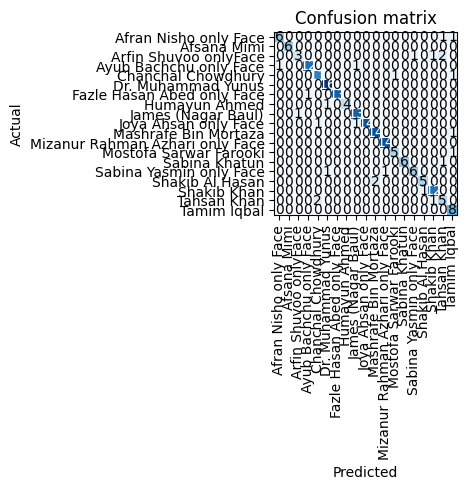

In [ ]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

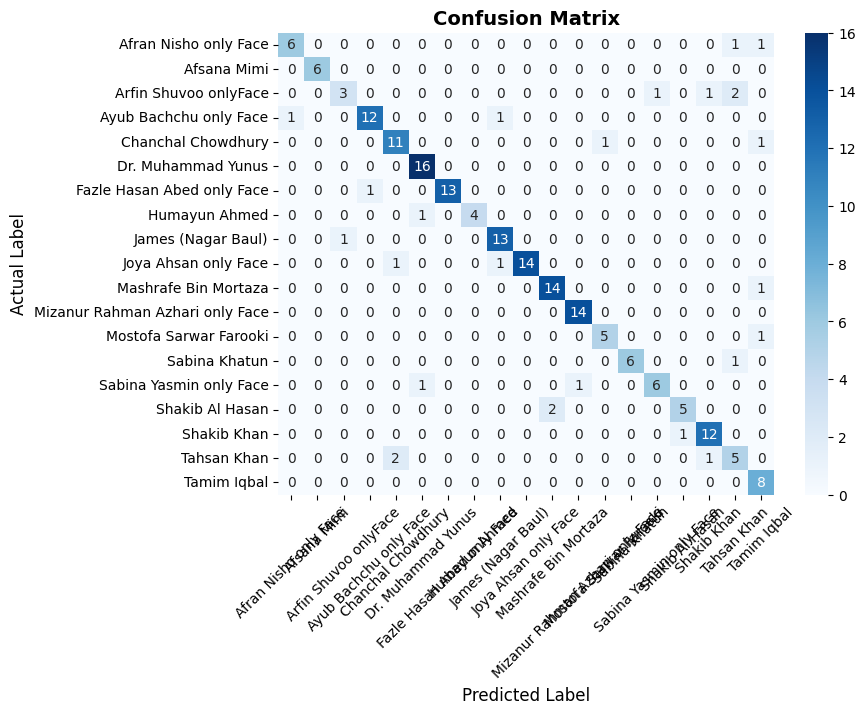

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from fastai.vision.all import *

# Generate confusion matrix
interp = ClassificationInterpretation.from_learner(model)
cm = interp.confusion_matrix()

# Define class labels
labels = interp.vocab  # Gets class labels from the learner

# Create a visually appealing heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

# Labels, title, and formatting
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("Actual Label", fontsize=12)
plt.title("Confusion Matrix", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)
plt.show()


In [ ]:
print(dls.vocab)  # If using FastAI


['Afran Nisho only Face', 'Afsana Mimi', 'Arfin Shuvoo onlyFace', 'Ayub Bachchu only Face', 'Chanchal Chowdhury', 'Dr. Muhammad Yunus', 'Fazle Hasan Abed only Face', 'Humayun Ahmed', 'James (Nagar Baul)', 'Joya Ahsan only Face', 'Mashrafe Bin Mortaza', 'Mizanur Rahman Azhari only Face', 'Mostofa Sarwar Farooki', 'Sabina Khatun', 'Sabina Yasmin only Face', 'Shakib Al Hasan', 'Shakib Khan', 'Tahsan Khan', 'Tamim Iqbal']


In [ ]:
#dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, item_tfms=Resize(224), remove_bad=True)
#print(dls.vocab)  # Ensure "My project" is removed


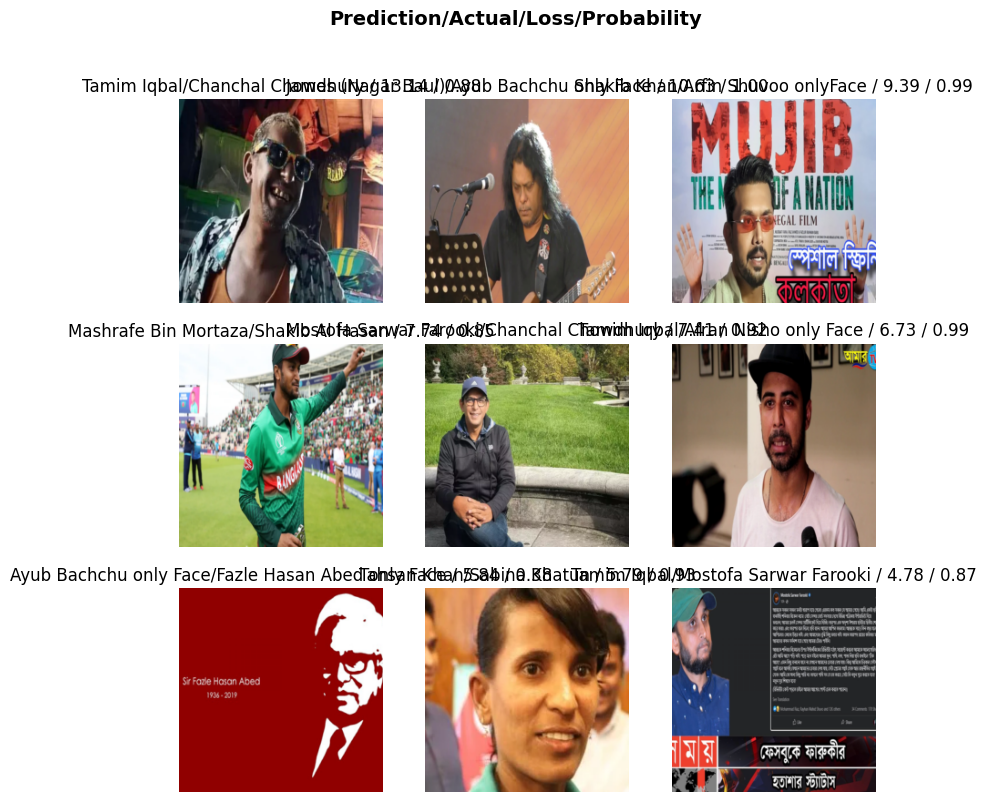

In [ ]:
interp.plot_top_losses(9, nrows=3)

In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#1999) [Path('/content/drive/MyDrive/project/Data/Dr. Muhammad Yunus/c461133a-159f-40c8-a026-8ee4444dc57b.jpg'),Path('/content/drive/MyDrive/project/Data/Dr. Muhammad Yunus/7364ae5c-e292-4e43-91b1-4c6358ad6b33.jpg'),Path('/content/drive/MyDrive/project/Data/Dr. Muhammad Yunus/7b124604-0af8-4158-99ff-061e44e3e335.jpg'),Path('/content/drive/MyDrive/project/Data/Dr. Muhammad Yunus/c2fb8566-38b4-4397-a35f-f4bc444d3a8a.jpg'),Path('/content/drive/MyDrive/project/Data/Dr. Muhammad Yunus/ff83ad1f-3a5d-4053-aaf8-a1d7386e3c74.jpg'),Path('/content/drive/MyDrive/project/Data/Dr. Muhammad Yunus/2c905523-f6d6-465e-a66e-8963165ac7ba.jpg'),Path('/content/drive/MyDrive/project/Data/Dr. Muhammad Yunus/c07d9d92-bd74-4f9d-92f3-afc200930a03.jpg'),Path('/content/drive/MyDrive/project/Data/Dr. Muhammad Yunus/7ac39617-0a61-4e30-9e05-ae6d03783217.jpg'),Path('/content/drive/MyDrive/project/Data/Dr. Muhammad Yunus/73d46780-6973-4a70-8165-d5681f2e64e8.jpg'),Path('/content/drive/MyDrive/project/Data/Dr. Muhammad 

In [ ]:
cleaner = ImageClassifierCleaner(model)
cleaner

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()                                    # delete irrelevant data
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), f"{data_path}/{cat}") # change the directory

# Export model for inference

In [ ]:
model.export(f"{model_path}/celebrity_model-v5{version}.pkl")

In [ ]:
from fastai.vision.all import get_image_files

# Get all image file paths
image_files = get_image_files("path/to/your/images")

# Extract just the file names
file_names = [f.name for f in image_files]

# Print file names
print(file_names)


[]
